# Import packages

In [1]:
import tensorflow as tf
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
sns.set_theme()

In [2]:
from src.similarity_search.similarity_search_image import *
from src.similarity_search.utils import *

# Evaluate CNN Siamese model trained with all categories

In [ ]:
# Modell laden
model_path = "Model/CNN_trained_with_all_categories/"
img_model = ImageClassifier(f"{model_path}embedding_self_all_08", load=True)

In [ ]:
## Daten aller Kategorien
X_train_image_left, X_train_image_right,\
    X_test_image_left, X_test_image_right, Y_train, Y_test = load_and_resize_image(input_path+f"/train.jsonl",\
                                                                  input_path+f"/test.jsonl", folder, link_as_ID=True)
Precision, Recall, interpolated_precision,\
F1, optimal_threshold, scores = img_model.train(X_train_image_left, X_train_image_right, Y_train)
scores.dump('Result/CNN_all_categories_result.pkl')
print(f"Optimal threshold for image similarity search: {optimal_threshold}")
print(f"Maximal F1 of text similarity search: {np.max(F1)}")

In [ ]:
df_ditto = pd.read_pickle("Result/ditt_scores_all_cat.pkl")
df_img = pd.read_pickle("Result/CNN_all_categories_result.pkl")

In [ ]:
ditto_scores, scores_img = np.asarray(df_ditto["ditto_scores_train"][0]), df_img
Y_train = df_ditto["Y_train"][0]
max_f1, coef_text, coef_image, opt_theta, scores = find_optimal_coef(scores_ditto, scores_img, Y_train)
scores.dump("Result/Ditto_CNN_allcat_result.pkl")
print("Optimal values:")
print(f"Maximal F1 = {max_f1}")
print(f"Coefficient text = {coef_text}")
print(f"Coefficient image = {coef_image}")
print(f"Threshold = {opt_theta}")

# Visualize

Requisites: table_1.ipynb was run and result outputs were saved in Result folder.

In [3]:
df_ditto = pd.read_pickle("Result/ditto_scores_all_cat.pkl")
scores_img = pd.read_pickle("Result/CNN_all_categories_result.pkl")
mixed_scores = pd.read_pickle("Result/Ditto_CNN_allcat_result.pkl")

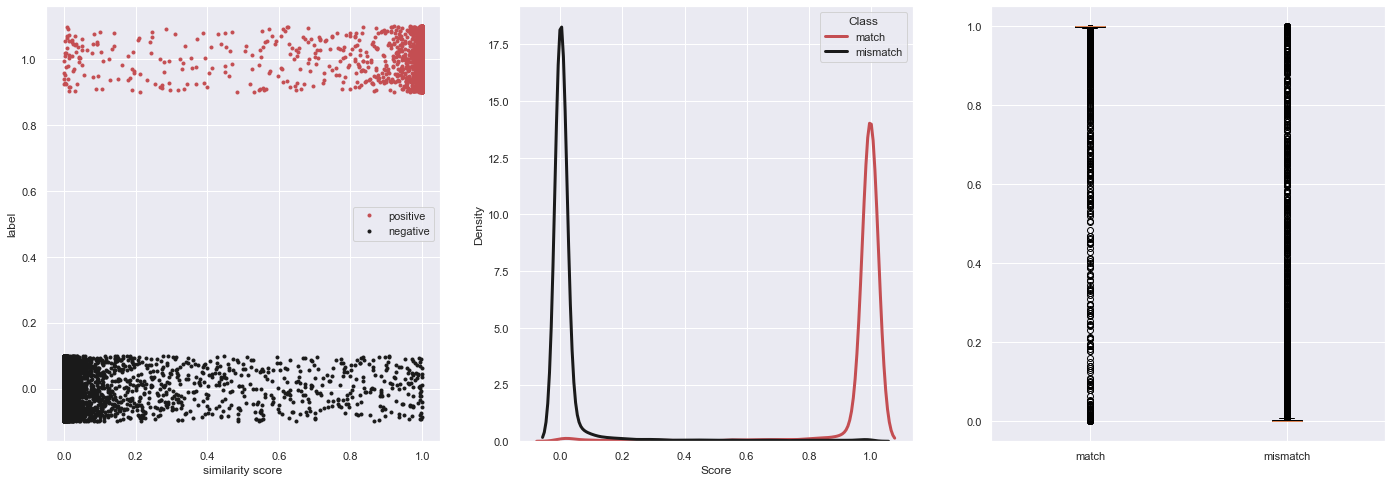

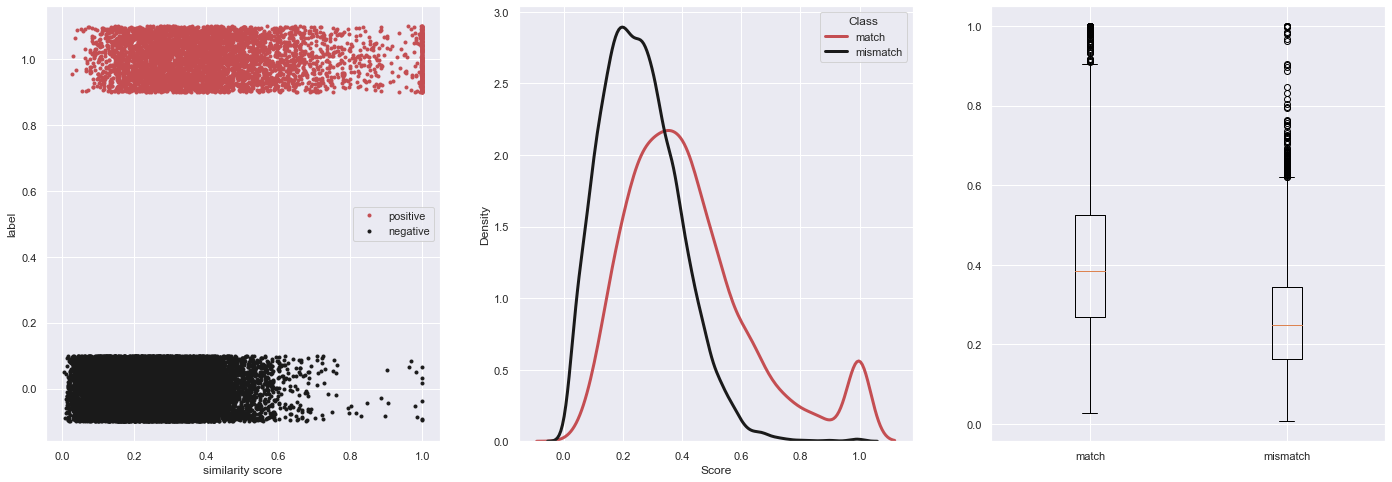

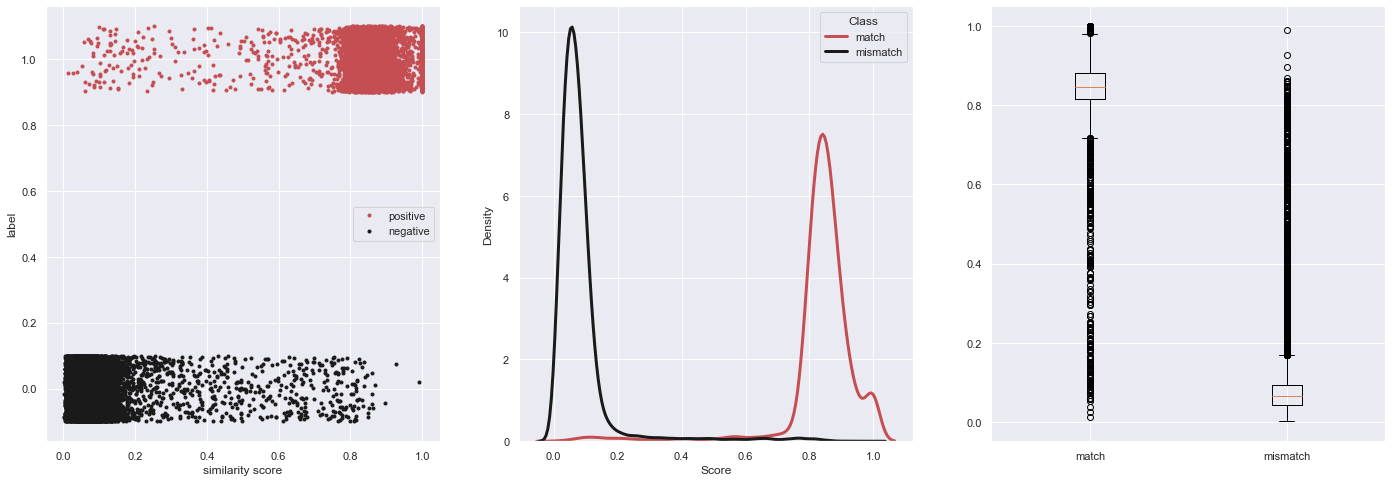

In [4]:
scores_ditto = np.asarray(df_ditto["ditto_scores_train"][0])
scores = pd.read_pickle("result/Ditto_CNN_allcat_result.pkl")
Y_train = df_ditto["Y_train"][0]
Y_train = np.asarray(Y_train)
score_distribution(scores_ditto, Y_train, cat="ditto")
score_distribution(scores_img, Y_train, cat="image")
score_distribution(mixed_scores, Y_train, cat="mixed")